In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns
import scipy
from scipy.stats import pearsonr
import sklearn
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [5]:
df = pd.read_csv('WDBC.csv',index_col=False)
df.head()

,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractual dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df.drop('ID',axis=1,inplace=True)
df.head()

,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractual dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
X = df.drop('Diagnosis',axis=1)


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Diagnosis'] = le.fit_transform(df['Diagnosis'])
df.head()
y = df['Diagnosis']

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

In [11]:
from sklearn.decomposition import PCA
features_names = list(X.columns)
pca = PCA(n_components=10)
Xs_pca = pca.fit_transform(Xs)
Xs_pca = Xs_pca[:,0:3] # retain first 3 principal Components

In [13]:
# the Model is built using Sequential API in keras
# this Model contains 3 input neurons, 10 neurons in hidden layer and 1
# output neuron for binary classification
# You may design your own network structure for the task you have
# the Activation function will be differet for regression(linear) or multi-class classification (softmax)

model = keras.models.Sequential()
model.add(keras.layers.Dense(10,input_dim=3,activation = "relu"))
model.add(keras.layers.Dense(1,activation='sigmoid'))
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                40        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [14]:
# after a model is created we need to compile the model to specify the loss
# function and optimiser
# if you use one-hot encoding for multi-class you need to use
# 'categorical_crossentropy'
# if you use class index e.g. from 0 to 3, you can use
# 'sparse_categorical_crossentropy'

model.compile(loss="binary_crossentropy", optimizer = "sgd",metrics=["accuracy"])

# save the initial weight for initilise new models in cross validation
model.save_weights('model.h5')

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [15]:
# Then we split the data to train and test 80% / 20%
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs_pca,y,test_size=0.2,random_state=1,stratify=y)

In [16]:
# now we can start the training
# Tensorflow/keras uses np array, so need to convert the data format
# make sure the weights are initialised
model.load_weights('model.h5')

In [17]:
# Model learning
history = model.fit(np.array(Xs_train),np.array(y_train),epochs=50,validation_data=(np.array(Xs_test),np.array(y_test)))

Train on 455 samples, validate on 114 samples
Epoch 1/50
455/455 [==============================] - 0s 316us/sample - loss: 0.8997 - acc: 0.6242 - val_loss: 0.7881 - val_acc: 0.6491
Epoch 2/50
455/455 [==============================] - 0s 36us/sample - loss: 0.7144 - acc: 0.6330 - val_loss: 0.6678 - val_acc: 0.6404
Epoch 3/50
455/455 [==============================] - 0s 34us/sample - loss: 0.6082 - acc: 0.6418 - val_loss: 0.5879 - val_acc: 0.6316
Epoch 4/50
455/455 [==============================] - 0s 35us/sample - loss: 0.5393 - acc: 0.6593 - val_loss: 0.5302 - val_acc: 0.6404
Epoch 5/50
455/455 [==============================] - 0s 33us/sample - loss: 0.4898 - acc: 0.6835 - val_loss: 0.4893 - val_acc: 0.6579
Epoch 6/50
455/455 [==============================] - 0s 33us/sample - loss: 0.4555 - acc: 0.7011 - val_loss: 0.4567 - val_acc: 0.6930
Epoch 7/50
455/455 [==============================] - 0s 33us/sample - loss: 0.4285 - acc: 0.7407 - val_loss: 0.4320 - val_acc: 0.7193
Epoch 8/

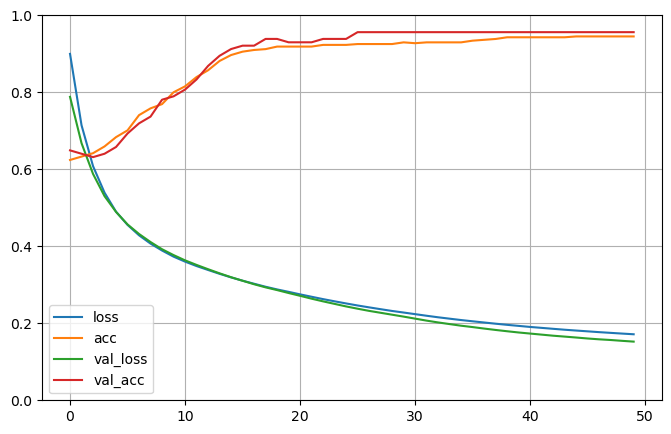

In [21]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # set the vertical range to [0-1]
plt.show()

In [25]:
from sklearn.model_selection import KFold
import os

# root file for logging the learning process and can be visualised later in tensorboard
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()

kf = KFold(n_splits = 5)
k = 1;

for train_index, test_index in kf.split(Xs_pca):
    print("fold",k)
    
    # initialise the weight for each fold
    model.load_weights('model.h5')
    
    # Split the data
    X_train, X_test = Xs_pca[train_index], Xs_pca[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # tensorboard for visualising the training process later
    tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
    
    # training and validation
    model.fit(np.array(X_train),np.array(y_train),epochs = 10, validation_data=(np.array(X_test),np.array(y_test)),callbacks=[tensorboard_cb])
    
    # save the model of each fold
    model.save(os.path.join('fold_{}_model.hdf5'.format(k)))
    
    # evaluate the accuracy of each fold
    scores = model.evaluate(np.array(X_test),np.array(y_test), verbose= 0)
    print("%s:%.2f%%" %(model.metrics_names[1],scores[1]*100))
    k=k+1

fold 1
Train on 455 samples, validate on 114 samples
Epoch 1/10
455/455 [==============================] - 0s 52us/sample - loss: 0.8330 - acc: 0.6857 - val_loss: 1.0791 - val_acc: 0.3947
Epoch 2/10
455/455 [==============================] - 0s 32us/sample - loss: 0.6776 - acc: 0.6967 - val_loss: 0.8983 - val_acc: 0.4123
Epoch 3/10
455/455 [==============================] - 0s 47us/sample - loss: 0.5671 - acc: 0.6967 - val_loss: 0.7986 - val_acc: 0.4211
Epoch 4/10
455/455 [==============================] - 0s 47us/sample - loss: 0.5013 - acc: 0.7033 - val_loss: 0.7346 - val_acc: 0.4649
Epoch 5/10
455/455 [==============================] - 0s 49us/sample - loss: 0.4577 - acc: 0.7121 - val_loss: 0.6869 - val_acc: 0.4825
Epoch 6/10
455/455 [==============================] - 0s 49us/sample - loss: 0.4261 - acc: 0.7231 - val_loss: 0.6495 - val_acc: 0.5088
Epoch 7/10
455/455 [==============================] - 0s 44us/sample - loss: 0.4009 - acc: 0.7341 - val_loss: 0.6171 - val_acc: 0.5526
Ep

In [26]:
#load one model to do prediction
model.load_weights('fold_5_model.hdf5')

# you can use "predict" to predict output in the range of [0 1]
y_pred = model.predict(np.array(X_test))

# or use model.evaluate to get the accuracy if the true labels are known
# here we use the test data of the last fold as an examplel,
# in practice this should be an independent test set

loss, acc = model.evaluate(np.array(X_test), np.array(y_test), verbose = 2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

113/113 - 0s - loss: 0.2879 - acc: 0.8850
Restored model, accuracy: 88.50%
